In [73]:
# introduce dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [74]:
# read in csv and convert to dataframe
file = 'Data/crypto_data.csv'
crypto_df = pd.read_csv(file, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [75]:
# find unique values of IsTrading column
crypto_df["IsTrading"].unique()

array([ True, False])

In [76]:
# filter on crypto currencies that are being traded and confirm only True remain
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df["IsTrading"].unique()

array([ True])

In [77]:
# remove CoinName from dataframe, as well as IsTrading since successfully removed cryptos not being traded
crypto_df.drop(["CoinName", "IsTrading"], axis = 1, inplace = True)

#confirm CoinName dropped
crypto_df.columns

Index(['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply'], dtype='object')

In [87]:
# drop null values
crypto_df.dropna(axis=0,how="any", inplace = True)

(685, 4)

In [90]:
# remove records with TotalCoinsMined valued < 0
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]

# sort TotalCoinsMined to confirm none left < 0
crypto_df.TotalCoinsMined.sort_values()

42      4.199995e+01
MOON    8.800000e+01
SYNC    1.177000e+03
BTB     4.257948e+04
PLTC    8.430000e+04
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 532, dtype: float64

In [97]:
# conver categorial features to numeric using get_dummies
# specify IsTrading column for get dummies since wasn't picking up in all inclusive run
crypto_dummy = pd.get_dummies(crypto_df, columns = ["Algorithm", "ProofType"])

# determine shape of data after all cleaning
crypto_dummy.shape

(532, 98)

In [106]:
crypto_dummy.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# scale data using StandardScaler
crypto_scaled = StandardScaler().fit_transform(crypto_dummy)
print(crypto_scaled)
crypto_scaled.shape

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


(532, 98)

In [127]:
# Applying PCA to reduce dimensions, using loop to test how features reduced based on varying component thresholds
component_list = [.99, .95, .90]

for component in component_list:
    # Initialize PCA model
    pca = PCA(n_components=component)
    
    # Get two principal components for the scaled crypto data
    crypto_pca = pca.fit_transform(crypto_scaled)
    print(f"PCA Component set to: {component}, Shape: {crypto_pca.shape}")

PCA Component set to: 0.99, Shape: (532, 86)
PCA Component set to: 0.95, Shape: (532, 79)
PCA Component set to: 0.9, Shape: (532, 74)


In [133]:
# determine the amount of variance explained using component set to 90%
pca.explained_variance_.sum()

88.47283457566155

In [152]:
# further reduce dimensionality using tsne

tsne = TSNE(learning_rate = 35, perplexity = 50)
tsneData = tsne.fit_transform(crypto_pca)
tsneData.shape

(532, 2)

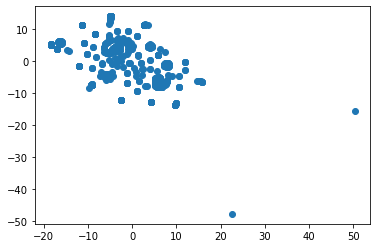

In [153]:
group1 = tsneData[:, 0]
group2 = tsneData[:, 1]
plt.scatter(group1, group2)
plt.show()

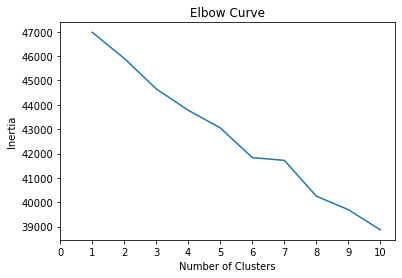

In [149]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()